In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv("./heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [8]:
X = df.drop('output', axis=1)
Y = df['output']

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, stratify=Y)

print("Mean of Y_Train :- ", y_train.mean(), " and that of Y_train " , y_test.mean())

Mean of Y_Train :-  0.5462555066079295  and that of Y_train  0.5394736842105263


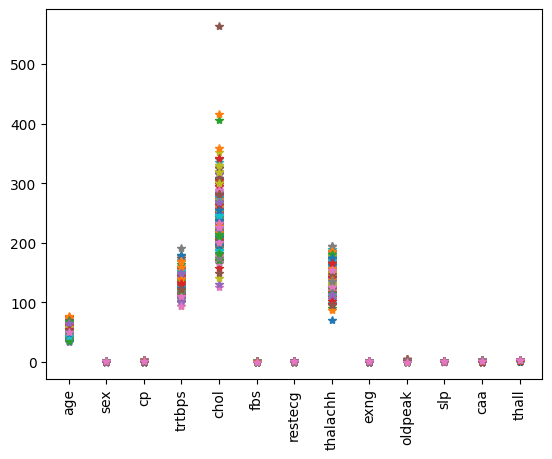

In [10]:
plt.plot(x_train.T, '*');
plt.xticks(rotation='vertical');

In [11]:
xnew_train = x_train.apply(pd.cut, bins = 2, labels=[0,1]).values
xnew_test = x_test.apply(pd.cut, bins = 2, labels=[0,1]).values

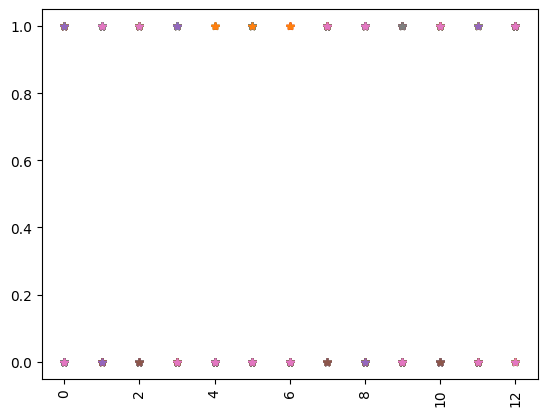

In [12]:
plt.plot(xnew_train.T, '*');
plt.xticks(rotation='vertical');

In [13]:
for b in range((x_train.shape[1] + 1)):
  acc_row = 0
  y_pred = []
  for x, y in zip(xnew_train, y_train):
    pred = np.sum(x) >= b
    y_pred.append(pred)
    acc_row += y==pred
  print(b, acc_row/x_train.shape[0])

0 0.5462555066079295
1 0.5462555066079295
2 0.5374449339207048
3 0.5154185022026432
4 0.5022026431718062
5 0.4581497797356828
6 0.44933920704845814
7 0.4581497797356828
8 0.46255506607929514
9 0.45374449339207046
10 0.45374449339207046
11 0.45374449339207046
12 0.45374449339207046
13 0.45374449339207046


In [14]:
from sklearn.metrics import accuracy_score

In [15]:
b = 5
y_pred = []
for x in xnew_test:
  pred = np.sum(x)>=b
  y_pred.append(pred)

accuracy_score(y_test, y_pred)


0.42105263157894735

In [16]:
class MPNeuron:
  def __init__(self):
    self.b = None

  def model(self, X):
    return (sum(x) >= self.b)

  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self, X, Y):
    accuracy = {}

    for b in range(X.shape[1] + 1):
      self.b = b
      Y_pred = self.predict(X)
      accuracy[b] = accuracy_score(Y_pred, Y)

    best_b = max(accuracy, key = accuracy.get)
    self.b = b

    print("Optimal value of b is ", best_b)
    print("Highest accuracy is ", accuracy[best_b])


In [17]:
mp_neuron = MPNeuron()
mp_neuron.fit(xnew_train , y_train)

Optimal value of b is  0
Highest accuracy is  0.5462555066079295
